In [12]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

In [13]:
#Initializing the Taxi-v3 environment
env = gym.make("Taxi-v3").env
state_space = env.observation_space.n
action_space = env.action_space.n



In [14]:
#defining baseline hyperparameters
baseline_alpha = 0.1
baseline_gamma = 0.6
baseline_epsilon = 0.1

In [17]:
# the training function
def train_q_learning(alpha, gamma, epsilon, episodes=3000, eval_episodes=100, max_steps=200, verbose=False):
    q_table = np.zeros((state_space, action_space))
    start_time = time.time()

    #training
    for _ in range(episodes):
        state = env.reset()
        done = False
        steps = 0
        while not done and steps < max_steps:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])
            next_state, reward, done, _ = env.step(action)
            q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])
            state = next_state
            steps += 1

    #eval
    total_steps = 0
    total_penalties = 0
    total_rewards = 0

    for _ in range(eval_episodes):
        state = env.reset()
        done = False
        steps = 0
        penalties = 0
        rewards = 0
        while not done and steps < max_steps:
            action = np.argmax(q_table[state])
            state, reward, done, _ = env.step(action)
            rewards += reward
            if reward == -10:
                penalties += 1
            steps += 1
        total_steps += steps
        total_penalties += penalties
        total_rewards += rewards

    avg_steps = total_steps / eval_episodes
    avg_penalties = total_penalties / eval_episodes
    avg_reward = total_rewards / eval_episodes
    if verbose:
        print(f"\n Q learning eval:")
        print(f" α={alpha}, γ={gamma}, ε={epsilon}")
        print(f"reward {avg_reward:.2f} | Steps: {avg_steps:.2f} | Penalties: {avg_penalties:.2f}")
        print(f"time{time.time() - start_time:.2f} sec")

    return avg_steps, avg_penalties, avg_reward


In [24]:
def tracking_rewards(alpha, gamma, epsilon, episodes=1000, max_steps=200):

    q_table = np.zeros((state_space, action_space))
    rewards = []

    for _ in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        steps = 0

        while not done and steps < max_steps:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])
            next_state, reward, done, _ = env.step(action)
            q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])
            state = next_state
            total_reward += reward
            steps += 1

        rewards.append(total_reward)

    return rewards


In [25]:
train_q_learning(alpha=0.1, gamma=0.6, epsilon=0.1)


(90.86, 0.0, -78.68)

In [26]:
train_q_learning(alpha=0.5, gamma=0.9, epsilon=0.3, episodes=3000, eval_episodes=100)


(13.08, 0.0, 7.92)

In [27]:
#grid of hyperparameters
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
gammas = [0.3, 0.6, 0.9]
epsilons = [0.1, 0.3, 0.5]

grid_results = []

In [28]:
for alpha in alphas:
    for gamma in gammas:
        for epsilon in epsilons:
            avg_steps, avg_penalties, avg_reward = train_q_learning(
                alpha=alpha,
                gamma=gamma,
                epsilon=epsilon,
                episodes=3000,
                eval_episodes=100,
                verbose=False  # silence output per run
            )
            grid_results.append({
                'alpha': alpha,
                'gamma': gamma,
                'epsilon': epsilon,
                'avg_steps': avg_steps,
                'avg_penalties': avg_penalties,
                'avg_reward': avg_reward
            })

import pandas as pd
df_grid = pd.DataFrame(grid_results)
display(df_grid)

alpha  gamma  epsilon  avg_steps  avg_penalties  avg_reward
0     0.1    0.3      0.1     128.17            0.0     -120.19
1     0.1    0.3      0.3     118.80            0.0     -109.77
2     0.1    0.3      0.5     118.81            0.0     -109.78
3     0.1    0.6      0.1      75.93            0.0      -62.07
4     0.1    0.6      0.3     100.42            0.0      -89.29
5     0.1    0.6      0.5      85.11            0.0      -72.30
6     0.1    0.9      0.1      20.53            2.0      -18.37
7     0.1    0.9      0.3      18.42            0.0        1.95
8     0.1    0.9      0.5      18.48            0.0        1.89
9     0.3    0.3      0.1      48.18            0.0      -31.17
10    0.3    0.3      0.3      31.71            0.0      -12.81
11    0.3    0.3      0.5      29.18            0.0      -10.07
12    0.3    0.6      0.1      22.21            0.0       -2.26
13    0.3    0.6      0.3      24.32            0.0       -4.58
14    0.3    0.6      0.5      20.45            0.0       -0.29
15    0.3    0.9      0.1      12.62            0.0        8.38
16    0.3    0.9      0.3      13.49            0.0        7.51
17    0.3    0.9      0.5      13.09            0.0        7.91
18    0.5    0.3      0.1      25.95            0.0       -6.42
19    0.5    0.3      0.3      28.17            0.0       -8.85
20    0.5    0.3      0.5      14.58            0.0        6.21
21    0.5    0.6      0.1      16.33            0.0        4.25
22    0.5    0.6      0.3      14.96            0.0        5.83
23    0.5    0.6      0.5      15.40            0.0        5.39
24    0.5    0.9      0.1      13.28            0.0        7.72
25    0.5    0.9      0.3      13.24            0.0        7.76
26    0.5    0.9      0.5      13.15            0.0        7.85
27    0.7    0.3      0.1      18.73            0.0        1.64
28    0.7    0.3      0.3      12.65            0.0        8.35
29    0.7    0.3      0.5      13.07            0.0        7.93
30    0.7    0.6      0.1      13.40            0.0        7.60
31    0.7    0.6      0.3      13.05            0.0        7.95
32    0.7    0.6      0.5      12.68            0.0        8.32
33    0.7    0.9      0.1      13.27            0.0        7.73
34    0.7    0.9      0.3      12.91            0.0        8.09
35    0.7    0.9      0.5      13.13            0.0        7.87
36    0.9    0.3      0.1      14.66            0.0        6.13
37    0.9    0.3      0.3      12.95            0.0        8.05
38    0.9    0.3      0.5      13.16            0.0        7.84
39    0.9    0.6      0.1      13.28            0.0        7.72
40    0.9    0.6      0.3      12.71            0.0        8.29
41    0.9    0.6      0.5      13.05            0.0        7.95
42    0.9    0.9      0.1      12.70            0.0        8.30
43    0.9    0.9      0.3      13.12            0.0        7.88
44    0.9    0.9      0.5      12.64            0.0        8.36

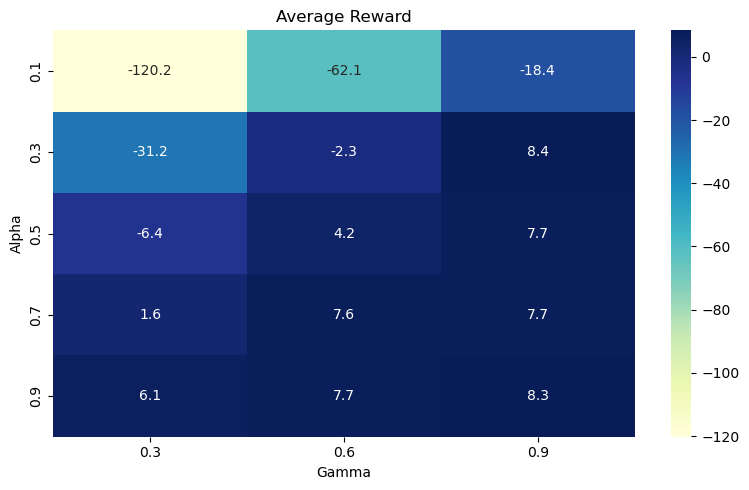

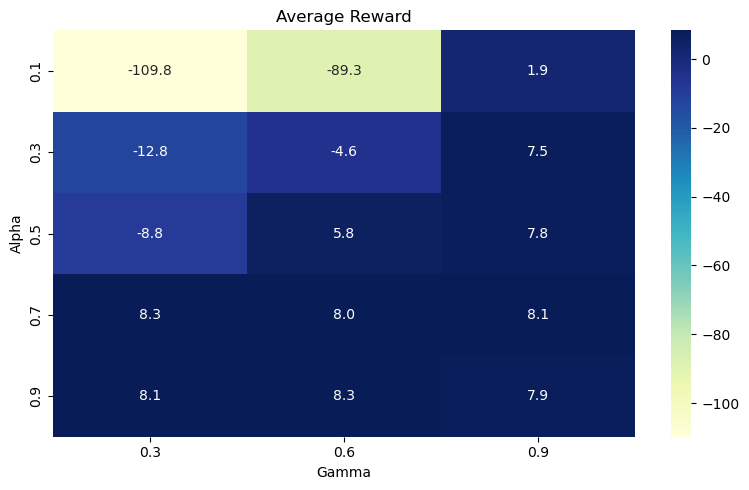

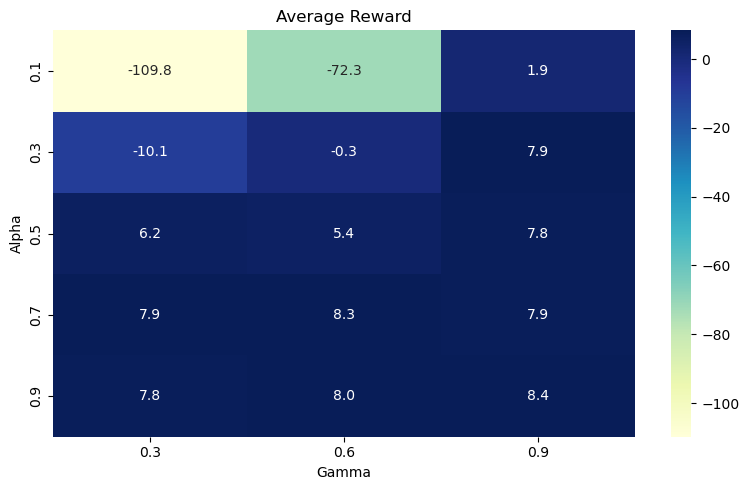

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

#average reward for each epsilon value
for eps in df_grid['epsilon'].unique():
    data = df_grid[df_grid['epsilon'] == eps]
    reward_pivot = data.pivot(index="alpha", columns="gamma", values="avg_reward")

    plt.figure(figsize=(8, 5))
    sns.heatmap(reward_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
    plt.title(f"Average Reward")
    plt.xlabel("Gamma")
    plt.ylabel("Alpha")
    plt.tight_layout()
    plt.show()


In [30]:
#the best config
best = df_grid.loc[df_grid['avg_reward'].idxmax()]

print(f"\n the best configuration:")
print(f" Alpha:   {best.alpha}")
print(f"  Gamma:  {best.gamma}")
print(f"  Epsilon: {best.epsilon}")
print(f"  Reward:   {best.avg_reward:.2f}")
print(f"  Steps:    {best.avg_steps:.2f}")
print(f"  Penalties:{best.avg_penalties:.2f}")



 the best configuration:
 Alpha:   0.3
  Gamma:  0.9
  Epsilon: 0.1
  Reward:   8.38
  Steps:    12.62
  Penalties:0.00


In [32]:
rewards = tracking_rewards(alpha=0.3, gamma=0.9, epsilon=0.1, episodes=1000)


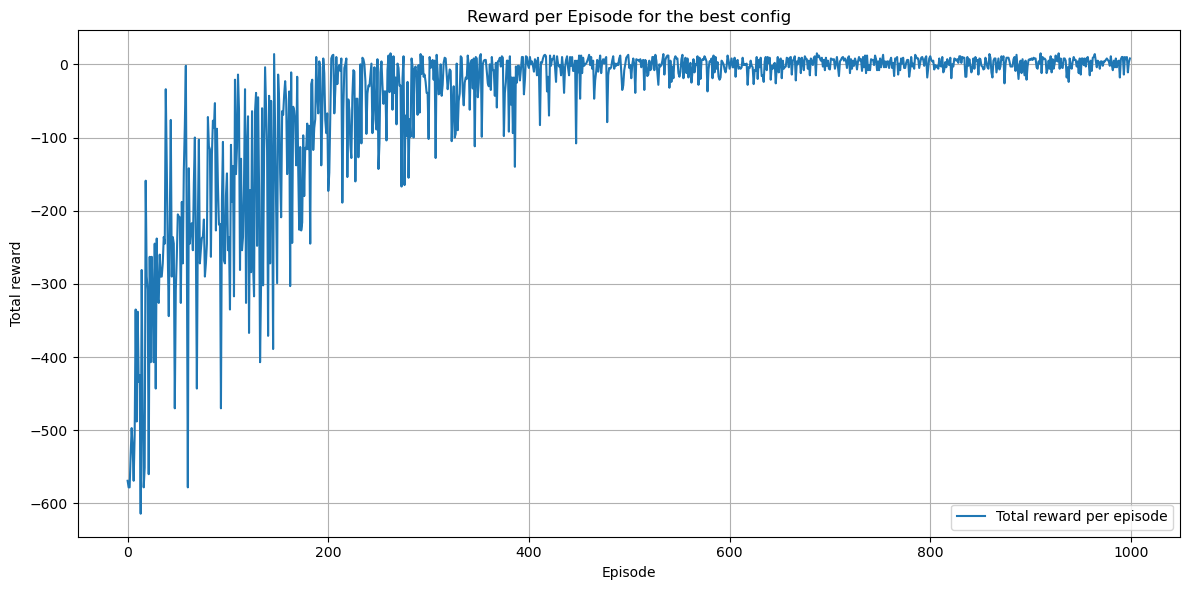

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(rewards, label="Total reward per episode")
plt.title("Reward per Episode for the best config")
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
